In [2]:
%load_ext autoreload
%autoreload 2
%aimport mcfost
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
from numpy import unravel_index
import astropy.units as unit
import pysynphot
import os
from sh import gunzip
import os
import math
from sh import gunzip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/SPC_band/'
model='best_SED_Mie/'
file_dir=main_dir+model

In [9]:
res = mcfost.run_one_file(file_dir+'HR4796_best_SED_DHS_Milli.para', wavelengths=[0.78,0.795,0.81,0.825,0.84,0.855,0.87], move_to_subdir=False)

OSError: Nonexistent file: /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/SPC_band/best_SED_Mie/HR4796_best_SED_DHS_Milli.para

In [51]:
model = mcfost.ModelResults(file_dir)
print(model)
print(list(model._wavelengths_lookup.values()))
model.describe()

<MCFOST ModelResults in directory '/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/SPC_band/best_SED_Mie'>
['0.825', '0.78', '0.84', '0.795', '0.855', '0.81', '0.87']
Model results in /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/SPC_band/best_SED_Mie for HR4796_best_SED_Mie_Milli.para
    Model has 1 inclinations from 75.8 to 75.8
    SED computed from 0.1 - 3000.0 microns using 50 wavelengths
    Images computed for 7 wavelengths: [0.825 0.78  0.84  0.795 0.855 0.81  0.87 ] micron


In [52]:
inc=model.images['0.825']
px=256
py=256
psf_scale=0.0208 ##arcsecs/pixel
xpix=(np.arange (-px/2, px/2, 1))*psf_scale
ypix=(np.arange (-px/2, px/2, 1))*psf_scale
sq_as_per_pix=psf_scale**2
c=2.99792*10**14
lam=0.825 #in microns#
jy=10**26
sst=np.reshape(inc.data[5,0],(px,py))
sst_jy=(sst/c)*(lam)*jy
np.max(sst_jy)

7.51135576940976e-05

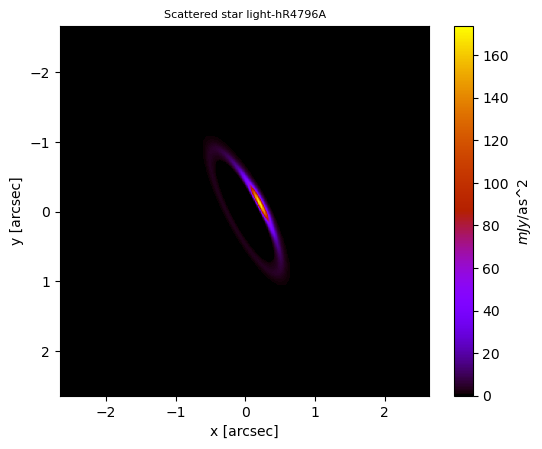

In [53]:
fig=plt.figure(dpi=100)
ax2=plt.subplot(111)
im2=ax2.imshow(sst_jy.astype(np.float64)/sq_as_per_pix*1000,
               cmap='gnuplot',extent=[np.min(ypix),np.max(ypix),np.min(xpix),np.max(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title('Scattered star light-hR4796A',fontsize=8)
cb=plt.colorbar(im2,orientation='vertical')
cb.set_label("$mJy$/as^2")

In [54]:
Q=np.reshape(inc.data[1,0],(px,py))
U=np.reshape(inc.data[2,0],(px,py))
Q_jy=(Q/c)*(lam)*jy
U_jy=(U/c)*(lam)*jy

X, Y = np.mgrid[(0):(256):256j, (0):(256):256j]
Phi=np.arctan2((X-128),(Y-128))

Q_phi=(Q_jy*np.cos(2*Phi_new)+U_jy*np.sin(2*Phi_new))
U_phi=-Q_jy*np.sin(2*Phi_new)+U_jy*np.cos(2*Phi_new)
theta=0.5*np.arctan2(U,Q)
p=Q_phi.astype(np.float64)/sst_jy.astype(np.float64)
p[p>0.93287337]=0

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_28050/3341158069.py:12: RuntimeWarning: invalid value encountered in true_divide
  p=Q_phi.astype(np.float64)/sst_jy.astype(np.float64)


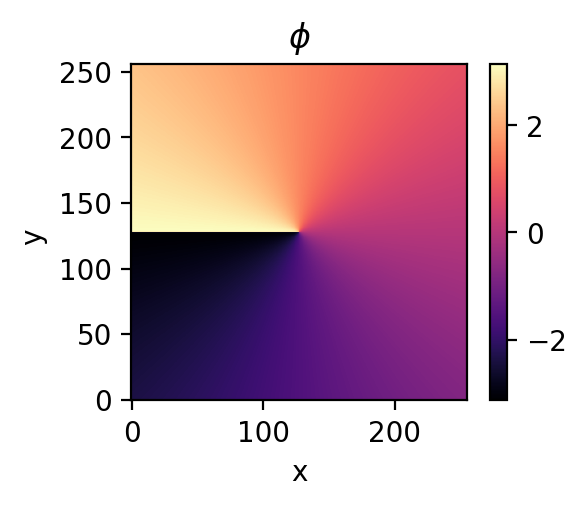

In [55]:
fig = plt.figure(dpi=200)
ax1=fig.add_subplot(221)
im1=ax1.imshow(Phi.astype(np.float64),cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('y ')
ax1.set_xlabel('x')
ax1.set_title(r'$\phi$')
cb = fig.colorbar(im1,orientation='vertical')
ax1.grid(False)

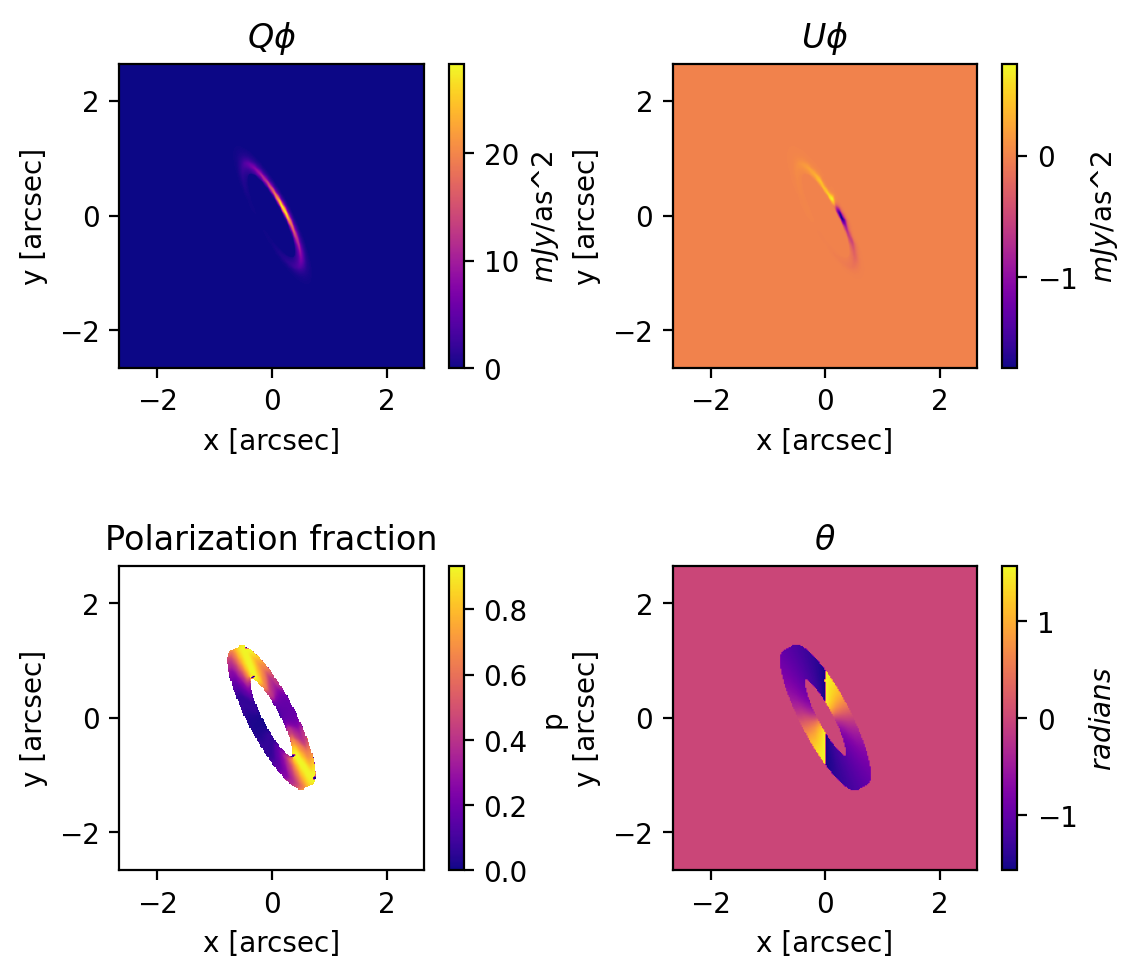

In [56]:
fig = plt.figure(dpi=200)
ax1=fig.add_subplot(221)
im1=ax1.imshow(Q_phi.astype(np.float64)/sq_as_per_pix*1000,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title(r'$Q\phi$')
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label("$mJy$/as^2")
ax1.grid(False)

ax2=fig.add_subplot(222)
im2=ax2.imshow(U_phi.astype(np.float64)/sq_as_per_pix*1000,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title(r'$U\phi$')
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label("$mJy$/as^2")
ax2.grid(False)


ax1=fig.add_subplot(223)
im1=ax1.imshow(p.astype(np.float64),cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title('Polarization fraction')
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label("p")
ax1.grid(False)

ax1=fig.add_subplot(224)
im1=ax1.imshow(theta,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title(r'$\theta$')
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label("$radians$")
ax1.grid(False)


fig.subplots_adjust(hspace=0.65, wspace=0.1, top=0.95, right=0.95)

In [57]:
np.nanmax(p)

0.9328249814461925

In [58]:
SB=-2.5*np.log10(sst_jy.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_28050/1330700986.py:1: RuntimeWarning: divide by zero encountered in log10
  SB=-2.5*np.log10(sst_jy.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)


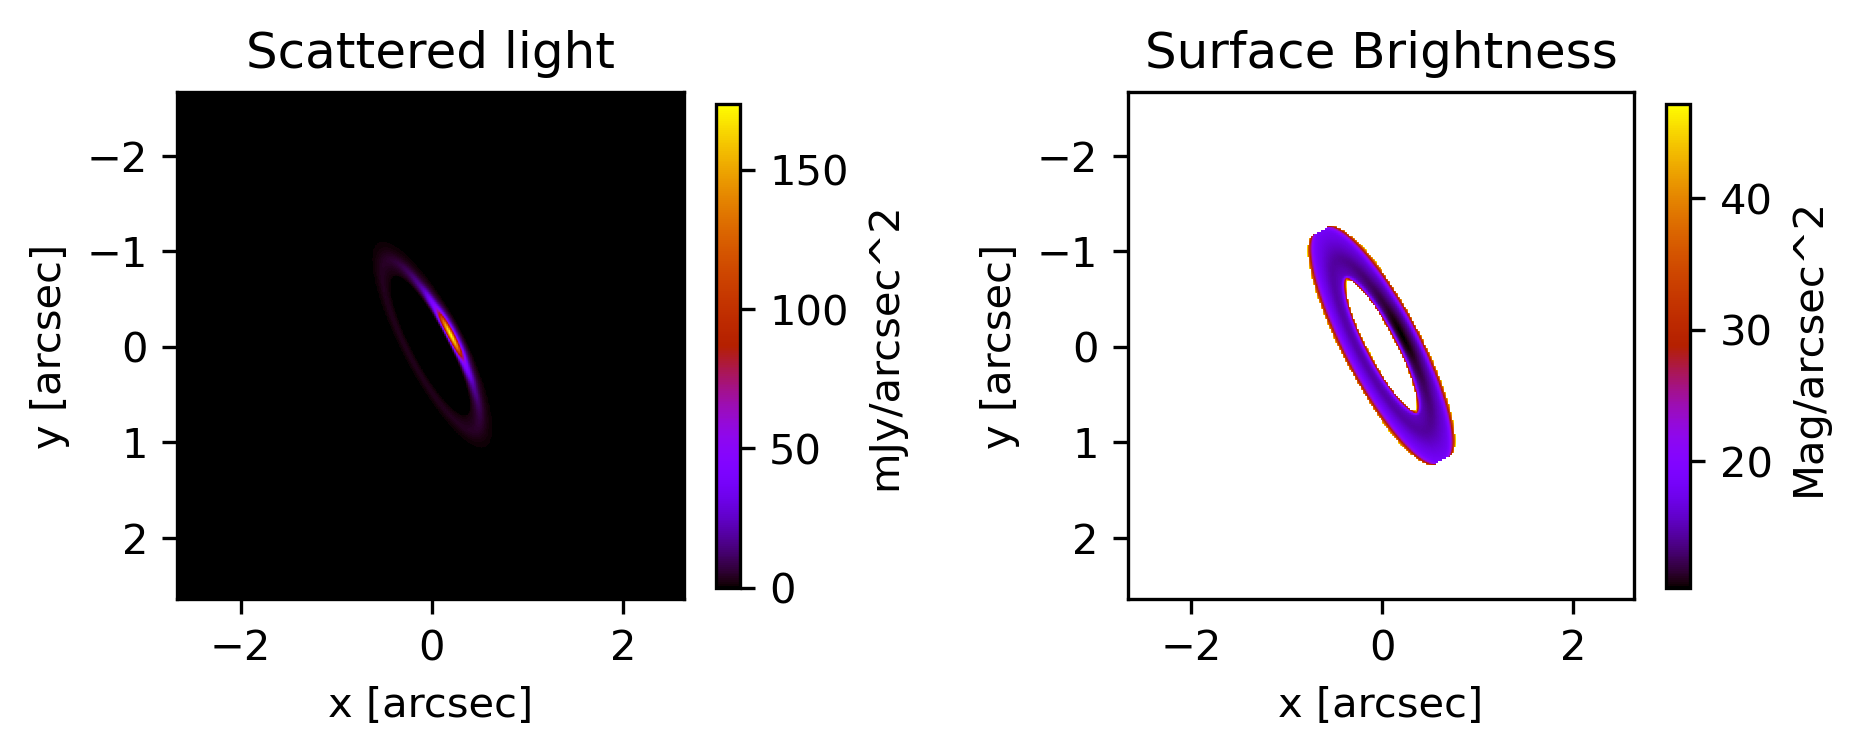

In [59]:
fig=plt.figure(dpi=300)
ax2=plt.subplot(121)
im2=ax2.imshow(sst_jy.astype(np.float64)/sq_as_per_pix*1000,
               cmap='gnuplot',extent=[np.min(ypix),np.max(ypix),np.min(xpix),np.max(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title('Scattered light')
cb=plt.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("mJy/arcsec^2")

ax2=plt.subplot(122)
im2=ax2.imshow(SB.astype(np.float64),
               cmap='gnuplot',extent=[np.min(ypix),np.max(ypix),np.min(xpix),np.max(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title('Surface Brightness')
cb=plt.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("Mag/arcsec^2")
fig.subplots_adjust(hspace=0.65, wspace=0.5, top=0.95, right=0.95)

In [60]:
Mflux=2432
Pdia=236.31   # Area of the primary mirror
Sdia=53.6      #secondary mirror# 
lc=8250      #central wavelength#
FilBW=968   # 56.5 nm nm#
Obs=((Pdia/2)**2-(Sdia/2)**2)/(Pdia/2)**2          #Obscuration ratio#
area=math.pi*(Pdia/2)**2 
Ph=Mflux*1.51*10**7/(10000*lc) #photons/s/cm^2/angstrom#
#Transmission parameters#
mir=0.98           #Telescope mirrors reflectivity#
Eff=Obs*mir**3                      # Telescope efficiency
Nphot=Eff*Ph*10**(-0.4*SB)*FilBW*area   #sst_mag is in mag/arc^2

In [61]:
I0=(sst_jy+Q_jy)/2
I90=(sst_jy-Q_jy)/2
I45=(sst_jy+U_jy)/2
I135=(sst_jy-U_jy)/2

In [40]:
I0sb=-2.5*np.log10(I0.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
I0ph=Eff*Ph*10**(-0.4*I0sb)*FilBW*area 
I90sb=-2.5*np.log10(I90.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
I90ph=Eff*Ph*10**(-0.4*I90sb)*FilBW*area 
I45sb=-2.5*np.log10(I45.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
I45ph=Eff*Ph*10**(-0.4*I45sb)*FilBW*area 
I135sb=-2.5*np.log10(I135.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
I135ph=Eff*Ph*10**(-0.4*I135sb)*FilBW*area 

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_7396/2697649391.py:1: RuntimeWarning: divide by zero encountered in log10
  I0sb=-2.5*np.log10(I0.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_7396/2697649391.py:3: RuntimeWarning: divide by zero encountered in log10
  I90sb=-2.5*np.log10(I90.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_7396/2697649391.py:5: RuntimeWarning: divide by zero encountered in log10
  I45sb=-2.5*np.log10(I45.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_7396/2697649391.py:7: RuntimeWarning: divide by zero encountered in log10
  I135sb=-2.5*np.log10(I135.astype(np.float64)/2432)+2.5*np.log10(sq_as_per_pix)


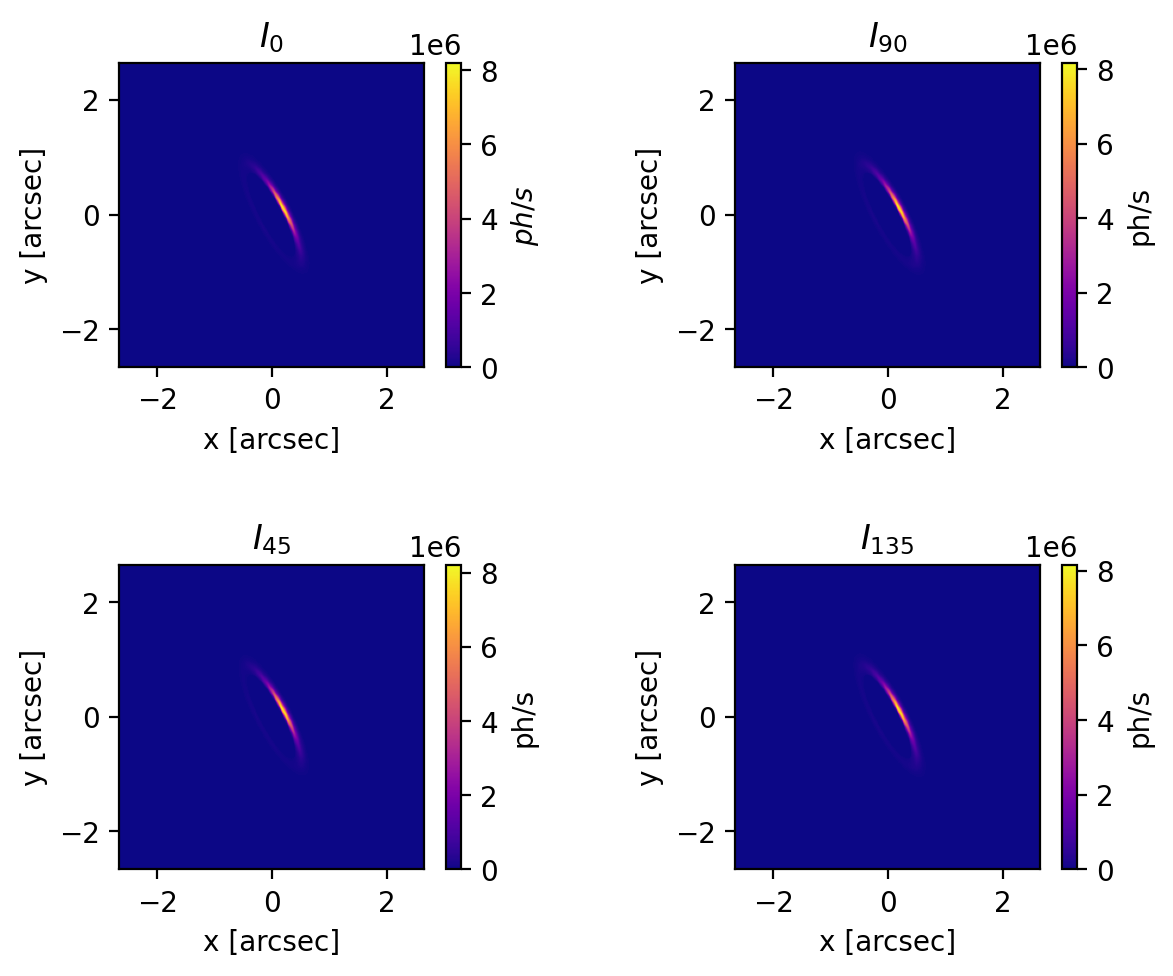

In [41]:
fig = plt.figure(dpi=200)
ax1=fig.add_subplot(221)
im1=ax1.imshow(I0ph,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title('$I_{0}$')
cb = fig.colorbar(im1,orientation='vertical')
cb.set_label("$ph/s$")
ax1.grid(False)

ax2=fig.add_subplot(222)
im2=ax2.imshow(I90ph,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title('$I_{90}$')
cb = fig.colorbar(im2,orientation='vertical')
cb.set_label("ph/s")
ax2.grid(False)

ax3=fig.add_subplot(223)
im3=ax3.imshow(I45ph,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax3.invert_yaxis()
ax3.set_ylabel('y [arcsec]')
ax3.set_xlabel('x [arcsec]')
ax3.set_title('$I_{45}$')
cb = fig.colorbar(im3,orientation='vertical')
cb.set_label("ph/s")
ax3.grid(False)

ax4=fig.add_subplot(224)
im4=ax4.imshow(I135ph,cmap='plasma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax4.invert_yaxis()
ax4.set_ylabel('y [arcsec]')
ax4.set_xlabel('x [arcsec]')
ax4.set_title('$I_{135}$')
cb = fig.colorbar(im4,orientation='vertical')
cb.set_label("ph/s")
ax4.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.4, top=0.95, right=0.95)

In [104]:
hdu = fits.PrimaryHDU(I0ph)
hdul = fits.HDUList([hdu])
hdul.writeto(file_dir+'I_0_spc.fits',overwrite=True)
hdu = fits.PrimaryHDU(I90ph)
hdul = fits.HDUList([hdu])
hdul.writeto(file_dir+'I_90_spc.fits',overwrite=True)
hdu = fits.PrimaryHDU(I45ph)
hdul = fits.HDUList([hdu])
hdul.writeto(file_dir+'I_45_spc.fits',overwrite=True)
hdu = fits.PrimaryHDU(I135ph)
hdul = fits.HDUList([hdu])
hdul.writeto(file_dir+'I_135_spc.fits',overwrite=True)